Generate setigen signals that can then be put into seticore and used as part of clustering

Frame frequency range: 6089537853.095 MHz to 6089540711.324 MHz
Signal injected at: 6089540018.874
blimpy.waterfall INFO     __write_to_hdf5_light: Writing the spectra matrix for et_signals/test.h5 without blobbing.
hdf5plugin._filters WARNING  Deprecation: hdf5plugin.Bitshuffle's lz4 argument is deprecated, use cname='lz4' or 'none' instead.
hdf5plugin._filters WARNING  Deprecation: hdf5plugin.Bitshuffle's lz4 argument is deprecated, use cname='lz4' or 'none' instead.
blimpy.waterfall INFO     Conversion time: 0.01sec


<Figure size 640x480 with 0 Axes>

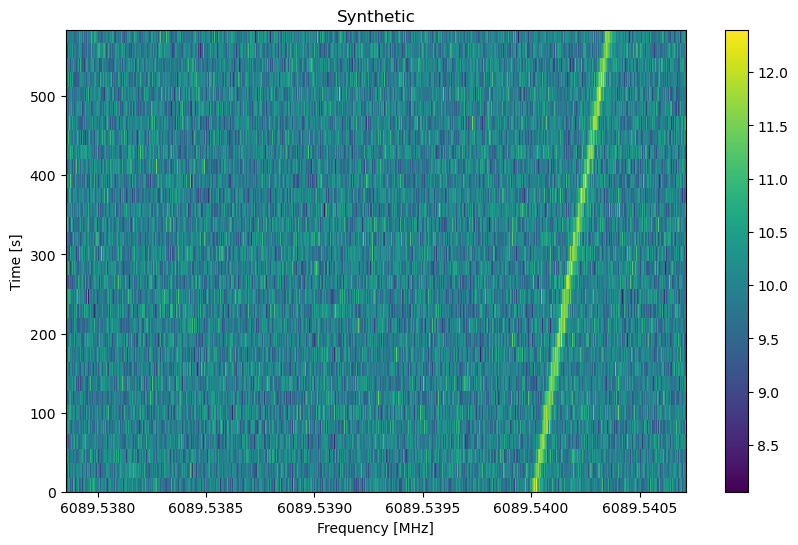

In [17]:
%matplotlib inline

from astropy import units as u
import setigen as stg
import pylab as plt
from blimpy import Waterfall
import os
import random

plt.clf()

# Create output directories
output_file = 'et_signals/test.h5'
os.makedirs('et_signals', exist_ok=True)
os.makedirs('outputs', exist_ok=True)

# Frame configuration
fch1 = random.uniform(6000, 6100) * u.MHz  # Randomized top frequency
df = 2.7939677238464355 * u.Hz
fchans = 1024
tchans = 32

frame = stg.Frame(
    fchans=fchans * u.pixel,
    tchans=tchans * u.pixel,
    df=df,
    dt=18.253611008 * u.s,
    fch1=fch1
)

# Add noise
noise = frame.add_noise(x_mean=10, noise_type='chi2')

# Compute frame frequency range (values already in MHz)
f_start_min = frame.get_frequency(index=0)
f_start_max = frame.get_frequency(index=fchans - 1)
f_start = random.uniform(f_start_min, f_start_max)  # Convert to Quantity for signal


# Add signal
signal = frame.add_signal(
    stg.constant_path(
        f_start=f_start,
        drift_rate=random.uniform(-2, 2) * u.Hz / u.s
    ),
    stg.constant_t_profile(
        level=frame.get_intensity(snr=random.uniform(10, 30))
    ),
    stg.gaussian_f_profile(
        width=random.uniform(20, 60) * u.Hz
    ),
    stg.constant_bp_profile(level=1)
)

# Print debug info
print(f"Frame frequency range: {f_start_min:.3f} MHz to {f_start_max:.3f} MHz")
print(f"Signal injected at: {f_start:.3f}")

# Save and plot
frame.data = frame.data.astype('float32')  # or 'float64' if you want higher precision
frame.save_h5(output_file)
fig = plt.figure(figsize=(10, 6))
file = Waterfall(output_file)
file.plot_waterfall()
plt.savefig('outputs/plot.png')


In [18]:
!seticore "et_signals/test.h5" --output "seticore_output/test.dat"

welcome to seticore, version 1.0.6
running in dedoppler mode.
loading input from et_signals/test.h5
dedoppler parameters: max_drift=10.00 min_drift=0.0000 snr=25.00
writing output to seticore_output/test.dat
unable to infer coarse channel size for data with dimensions: 32 x 1024. please set the nfpc header.
